For the final assignment of the semester:

Chunk all the Shakespeare plays into 5000 word chunks. Each chunk should be labeled in the format play_chunkno (i.e. 'merchant_of_venice_006' etc).

Topic model the chunks using 5, 10, 25, 50 topics.

Taking each topic distribution as your set of vectors, cluster the chunks using K-Means clustering where K=3. Draw the results of each clustering as a color-coded scatterplot.

# So I will need to:

set my path, open and read files, tokenize data, preprocess data, AND THEN chunk data

after--I have labeled chunks in accordance to assignment

topic model works with 5, 10,etc chunks

now take each as set of vectors--cluster chunks with k-means where
k=3--draw results as color-coded scatter

In [1]:
#conda install -c conda-forge gensim

In [1]:
conda install nbconvert

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import numpy as np
import glob
import os
import pandas as pd
import gensim
from gensim import corpora
from gensim import models
from gensim import similarities

In [3]:
##I need to set my path to my shakespeare folder so that I can read all the files
path = '/Users/jordanrichardson/Desktop/shakespeare/*'
filenames = glob.glob(path)
#print(filenames)

labels = []
labels = [os.path.split(fn)[1][:-4].replace('_', ' ').title() for fn in filenames]
#we split file names in path
##reads the file names 

##read the files

##I want to read all of these files as well


In [4]:
f= []
for file in filenames:
    f= open(file,"r")

   # print(f)
##read the files

<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/twelfth_night.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/julius_caesar.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/as_you_like_it.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/tempest.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/king_lear.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/cymbeline.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/coriolanus.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/1_king_henry_vi.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/jordanrichardson/Desktop/shakespeare/two_gentlemen_of_verona.t

In [5]:
def tokenize(s): 
    return s.split()
##this will split my text into tokens





def preprocess(s, lowercase=True, strip_punctuation=True):
    punctuation = '.,?<>:;"\'!%' ##punctuation that we care about
    if isinstance(s, str): ##if there is some string we will tokenize it
        s = tokenize(s)
    if lowercase: 
        s = [t.lower() for t in s]
    if strip_punctuation:
        s = [t.strip(punctuation) for t in s]
    return(s)




#then I need to run the token frequency, which takes in a list of words and returns the count of each word(how often each word appears) which returns a dictionary of words and their frequencies
def token_frequency(tokens, tf={}, relative=False):
    for t in tokens:
        if t in tf:
            tf[t]+=1
        else:
            tf[t]=1
    if relative:
        tf = {k:v/len(tokens) for k, v in tf.items()}
    return tf

s = preprocess(f.read()) ##reading file as string
e=token_frequency(s, relative=True)
#print(e)  ##dictionary of token frequencies

In [6]:
token_freqs = []
#i want to save my token freqs so i will do this, and all other variables 
token_freqs= [(token_frequency(preprocess(open(fn, 'r').read()))) for fn in filenames]

In [7]:
features = []


features = list(set([f for tf in token_freqs for f in tf]))

In [8]:
chunks = []

def chunk(text, chunk_size=1000):
    chunks = []
    for start in range(0, len(text)-chunk_size+1, chunk_size):
        chunks.append(text[start:start+chunk_size])
    return chunks


In [9]:
stop_words = []

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
file = []
def get_texts(file, stop_words):  ##LOOKS LIKE GET TEXT WILL TAKE in file, open it and read it then, preprocess it--and then store text in text if the text isnt a stop word
    for file in filenames:
        text = open(file, 'r').read()
        text = [t for t in preprocess(text) if t not in stop_words]
        yield(text)       # Note this instead of the usual return

In [10]:
t = []
for t in get_texts(f, stop_words=[]):
   # print(t[:5]) ##looks like the for loop works and goes through each file in shakespeare 

['if', 'music', 'be', 'the', 'food']
['hence', 'home', 'you', 'idle', 'creatures']
['as', 'i', 'remember', 'adam', 'it']
['boatswain', 'here', 'master', 'what', 'cheer']
['i', 'thought', 'the', 'king', 'had']
['you', 'do', 'not', 'meet', 'a']
['before', 'we', 'proceed', 'any', 'further']
['hung', 'be', 'the', 'heavens', 'with']
['cease', 'to', 'persuade', 'my', 'loving']
['two', 'households', 'both', 'alike', 'in']
['in', 'sooth', 'i', 'know', 'not']
['if', 'you', 'shall', 'chance', 'camillo']
['as', 'by', 'your', 'high', 'imperial']
['sir', 'hugh', 'persuade', 'me', 'not']
['tush', 'never', 'tell', 'me', 'i']
['i', 'wonder', 'how', 'the', 'king']
['i', 'learn', 'in', 'this', 'letter']
['#!/usr/bin/python', 'import', 'glob', 'import', 'os']
['old', 'john', 'of', 'gaunt', "time-honour'd"]
["i'll", 'pheeze', 'you', 'in', 'faith']
['now', 'fair', 'hippolyta', 'our', 'nuptial']
['proceed', 'solinus', 'to', 'procure', 'my']
['now', 'is', 'the', 'winter', 'of']
['good', 'day', 'sir', 'i', 'a

In [11]:
num_topics = []
dictionary = []
corpus = []
lda = []
corpus_lda = []
num_topics = 50  #change number of topics here--5,10,25,50
dictionary = corpora.Dictionary(get_texts(file, stop_words))  ##insight into these in the box below
corpus = [dictionary.doc2bow(text) for text in get_texts(file, stop_words)]
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

corpus_lda = lda[corpus]

In [12]:
##chunk labels can be seen in here, as well as 
##the set up for my topic modelling
freqs = {}  
file = []
 ##THE NUMBER OF TOPICS THAT WILL BE CHUNKED 
for file in filenames:
    text = preprocess(open(file, 'r').read())
    #text = open(file, 'r').read()
    #text = [t for t in preprocess(text) if t not in stop_words]
    chunks = chunk(text, chunk_size=5000)
    chunk_vecs = [token_frequency(chunk, tf={}, relative=True) for chunk in chunks]
    chunk_vecs = [{key:v[key] for key in v if key in features} for v in chunk_vecs]
    chunk_labels = ['{}_{:03}'.format(os.path.split(file)[1][:-4], i) for i, c in enumerate(chunks)]
   # print(chunk_labels) ##since this prints all the chunk labels as I want it
    
   
        
      
"""
ideally, here, i will have text open the file in the loop
then get rid of the stop words
those stop words will then move on to chunk my data into 5000
creating chunks
then chunk the vector--taking token frequency, as well as creating a empty 
dictionary "tf"--for chunks(the chunked text)--denoting key and values together from
the chunk_vecs--then assigns a label by clustering files 
from the in the file path to have the same ending denoted by chunk_labels

"""
        
        
        
    
    

['twelfth_night_000', 'twelfth_night_001', 'twelfth_night_002']
['julius_caesar_000', 'julius_caesar_001', 'julius_caesar_002']
['as_you_like_it_000', 'as_you_like_it_001', 'as_you_like_it_002', 'as_you_like_it_003']
['tempest_000', 'tempest_001', 'tempest_002']
['king_lear_000', 'king_lear_001', 'king_lear_002', 'king_lear_003', 'king_lear_004']
['cymbeline_000', 'cymbeline_001', 'cymbeline_002', 'cymbeline_003', 'cymbeline_004']
['coriolanus_000', 'coriolanus_001', 'coriolanus_002', 'coriolanus_003', 'coriolanus_004']
['1_king_henry_vi_000', '1_king_henry_vi_001', '1_king_henry_vi_002', '1_king_henry_vi_003']
['two_gentlemen_of_verona_000', 'two_gentlemen_of_verona_001', 'two_gentlemen_of_verona_002']
['romeo_and_juliet_000', 'romeo_and_juliet_001', 'romeo_and_juliet_002', 'romeo_and_juliet_003']
['merchant_of_venice_000', 'merchant_of_venice_001', 'merchant_of_venice_002', 'merchant_of_venice_003']
["winter's_tale_000", "winter's_tale_001", "winter's_tale_002", "winter's_tale_003"]


'\nideally, here, i will have text open the file in the loop\nthen get rid of the stop words\nthose stop words will then move on to chunk my data into 5000\ncreating chunks\nthen chunk the vector--taking token frequency, as well as creating a empty \ndictionary "tf"--for chunks(the chunked text)--denoting key and values together from\nthe chunk_vecs--then assigns a label by clustering files \nfrom the in the file path to have the same ending denoted by chunk_labels\n\n'

In [13]:
topn =5  ##taking top 5 words in works
text = []
topic = []
for text in corpus_lda:
    for topic, w in text:
        print(topic, w, end='\n')
  #  print()
 

2 0.07663626
9 0.029807393
15 0.11705416
23 0.100408986
36 0.6565241

15 0.35631278
36 0.19419001
37 0.39913642
49 0.01752505

15 0.26140484
23 0.011844637
36 0.7210083

15 0.11269259
23 0.45378295
33 0.2485564
36 0.17909774

2 0.021056008
9 0.020118907
15 0.5043391
23 0.21173768
36 0.028834863
37 0.09887781
48 0.07409748
49 0.017521113

9 0.0985395
15 0.13591188
23 0.4688925
36 0.24624237
37 0.014189198
48 0.012942435

9 0.44944477
15 0.058756392
23 0.024924563
36 0.40523762
37 0.04315272

9 0.6578871
15 0.22648025
23 0.0143408775
36 0.028357163
37 0.0610613

15 0.088610634
23 0.8621963
36 0.04239142

9 0.020377364
15 0.30663964
23 0.014929259
36 0.60062796
37 0.048248693

6 0.01179009
9 0.055492096
15 0.32850927
23 0.49241877
36 0.09980887

9 0.017233536
15 0.92256516
23 0.033526488
36 0.023900228

9 0.3354284
15 0.56774527
23 0.013190295
36 0.042316485
48 0.0304898

2 0.089918174
15 0.6155745
23 0.04800909
29 0.15186295
36 0.09398936

15 0.038716454
23 0.6713896
36 0.25486967
37 0.0

In [14]:
topic = []
tt = []
top_words = []
for topic in range(num_topics):
    tt = lda.get_topic_terms(topic, topn=topn)
    top_words = [dictionary[t] for t, w in tt]
    top_words = ', '.join(top_words)
   # print('Topic {:>2d}: {}'.format(topic, top_words))

Topic  0: thou, thy, shall, sir, thee
Topic  1: thou, thy, shall, lord, thee
Topic  2: thou, thy, sir, thee, shall
Topic  3: thou, thy, well, thee, shall
Topic  4: thy, good, thou, shall, lord
Topic  5: thou, lord, thy, shall, thee
Topic  6: thou, thy, shall, sir, thee
Topic  7: thou, thee, shall, lord, would
Topic  8: thou, shall, thy, lord, come
Topic  9: thou, shall, thy, thee, come
Topic 10: thy, shall, thou, thee, lord
Topic 11: thou, thy, good, shall, thee
Topic 12: thy, thou, shall, good, thee
Topic 13: thou, shall, thee, thy, sir
Topic 14: thou, shall, thy, good, lord
Topic 15: thou, thy, shall, lord, come
Topic 16: thou, shall, come, thy, thee
Topic 17: thou, thee, thy, man, lord
Topic 18: thee, thou, shall, thy, come
Topic 19: thou, thy, shall, good, lord
Topic 20: shall, thy, thou, good, thee
Topic 21: thou, lord, well, shall, thy
Topic 22: thou, thy, good, thee, shall
Topic 23: thou, shall, thy, thee, sir
Topic 24: thou, thy, shall, lord, thee
Topic 25: thou, thy, shall, lo

In [1]:
topics = []
i = []
for i, label in enumerate(labels):
    topics = sorted(corpus_lda[i], key = lambda x:x[1], reverse=True)
    topics = ['Topic {} ({:2.2f}%)'.format(t[0], t[1]*num_topics)  for t in topics]
    topics = ', '.join(topics)
   # print('{}:\n{}\n'.format(label, topics))
    
   # {}_{:03}

NameError: name 'labels' is not defined

In [16]:
#k-means test chunks
##getting relative frequency of chunked data
chunks = []
chunk_vecs = []
chunk_labels = []
file = []
chunkvectors_df = []
for file in filenames:
        text = preprocess(open(file, 'r').read())
    #text = open(file, 'r').read()
    #text = [t for t in preprocess(text) if t not in stop_words]
        chunks = chunk(text, chunk_size=5000)
        chunk_vecs = [token_frequency(chunk, tf={}, relative=True) for chunk in chunks]
        chunk_vecs = [{key:v[key] for key in v if key in features} for v in chunk_vecs]
        chunk_labels = ['{}_{:03}'.format(os.path.split(file)[1][:-4], i) for i, c in enumerate(chunks)]

#print(chunk_labels) ##since this prints all the chunk labels as I want it
#print(chunk_vecs)
#print(chunks)

#chunk_vecs = [token_frequency(chunk, tf={}, relative=True) for chunk in chunks]
#chunk_vecs = [{key:v[key] for key in v if key in features} for v in chunk_vecs]
##labeling chunks
#chunk_labels = ['{}_{:03}'.format(os.path.split(file)[1][:-4], i) for i, c in enumerate(chunks)]
#print(chunk_labels)

##creating chunk vectors

##I tried moving these variables around to see if they would be ran outside of the for loop

chunkvectors_df = pd.DataFrame(chunk_vecs, index=chunk_labels, columns=features).fillna(0)
chunkvectors_df.to_csv()

',,overgo,all-disgraced,rubs,numbered,portrait,toads,south,pigmy\'s,unplausive,ancestry,de,batlet,horse\'s,unsisting,enamoured,darted,me--a,emulation,bride-bed,drift,afflictions,spleens,dismes,tenement,marked,wrathful,firm,solicitation,unkinglike,want-wit,rate,premeditation,where--o,ancestor,lute,tirest,unstringed,pompey,souls!--,soul,adoption,employ,udge,rogero,l,sampson,threaten,pure,derides,rogues,unaccustom\'d,pistol\'s,stirrups,"camillo,--",lamely,hard-hearted,ruder,eleanor\'s,boar\'s,abodements,"power,--",abates,morsels,trials,prerogatived,violate,ugly,hollow-hearted,becoming,self-blood,disorderly,hunter\'s,shave\'t,discover,conspirator,ossa,pettiness,scath,proposer,discover\'d,tattlings,brush\'d,--o,bubbling,perform,never,overdone\'s,tinderbox,lain,fooling,go:--commends,discoverers,fresh-fair,brings,glided,casa,nicety,vales,upturned,chirrah,expositor,brier,january,"o,--as",chaudron,govern,exactly,apparell\'d,hive,garland,ace,welcome.--,waist,england\'s,four--,pepin,ignoble,bestr

In [18]:
from sklearn.cluster import KMeans
# k means is supposed to be 3
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(chunkvectors_df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
kmeans.labels_

array([2, 1, 0, 0, 0], dtype=int32)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(chunkvectors_df)

In [21]:
x = transformed[:,0]
y = transformed[:,1]

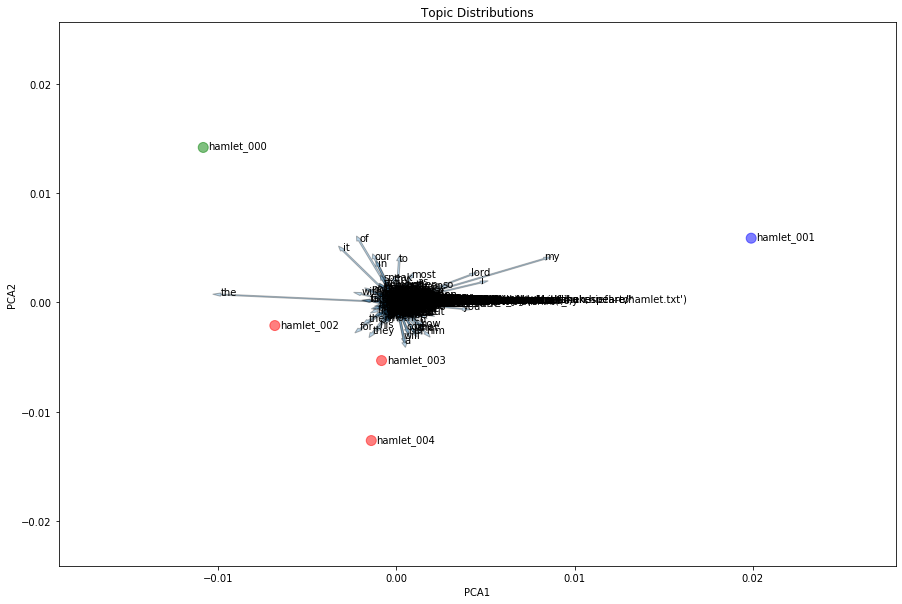

In [22]:
import matplotlib.pyplot as plt 

col_dict = {0:'red', 1:'blue', 2:'green'}
cols = [col_dict[l] for l in kmeans.labels_]
plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols, s=100, alpha=.5)
for i, l in enumerate(chunk_labels):
    plt.text(x[i]+.0003,y[i]-.0001, l)
for i, c in enumerate(pca.components_.transpose()):
    plt.arrow(0,0, c[0]/50, c[1]/50, alpha=.3, width=.0001)
    plt.text(c[0]/50, c[1]/50, features[i])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Topic Distributions')
plt.show()